# Data Exploration 2 Assignment
    1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
    2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
    3. Does the test preparation course seem to have an effect on the exam performances?
    4. Which 2 exam scores are most correlated with each other?

## Import and Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

%matplotlib inline
warnings.filterwarnings('ignore')

In [13]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
                    postgres_user, postgres_pw, postgres_host, 
                    postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance', con=engine)

engine.dispose()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# check for any NAN items in the dataframe
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The data looks very clean no additional work needed. 

## 1. Differences in Gender, Ethnicity, and Level of Education in Test Scores

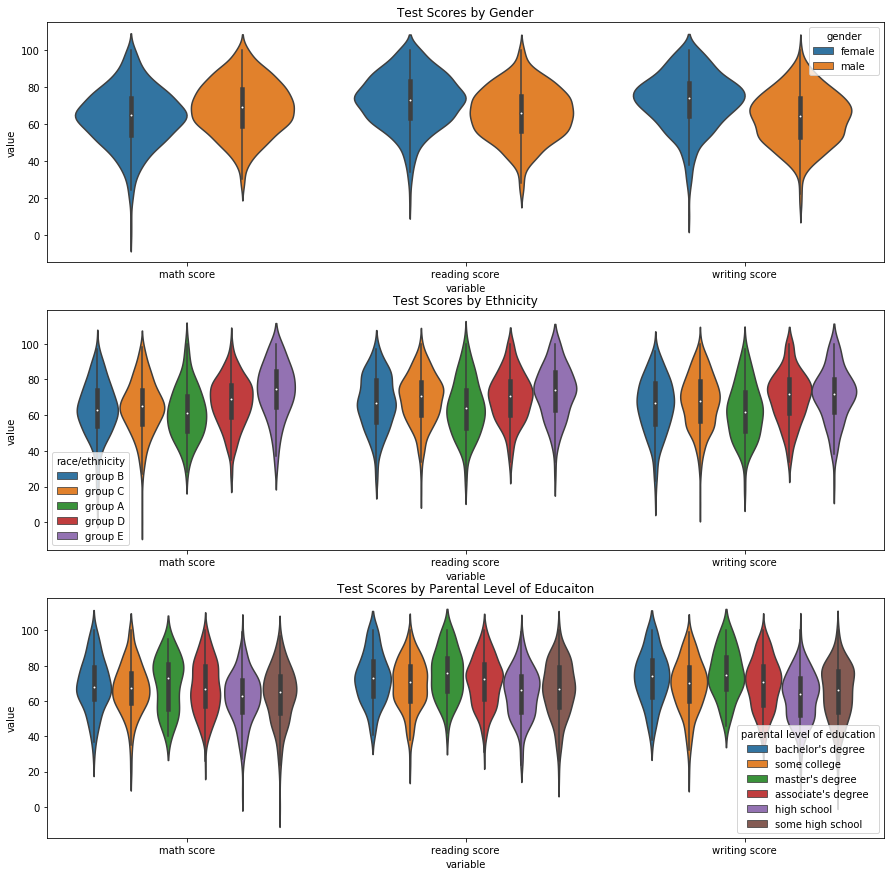

In [22]:
plt.figure(figsize=(15,15))

# create violin plot of each category noted above
# melt the test scores together
plt.subplot(3, 1, 1)
sns.violinplot(hue='gender', x='variable', y='value', 
             data=pd.melt(df, id_vars=['gender'], 
                          value_vars=['math score', 'reading score', 'writing score']))
plt.title('Test Scores by Gender')

plt.subplot(3, 1, 2)
sns.violinplot(hue='race/ethnicity', x='variable', y='value', 
             data=pd.melt(df, id_vars=['race/ethnicity'], 
                          value_vars=['math score', 'reading score', 'writing score']))
plt.title('Test Scores by Ethnicity')

plt.subplot(3, 1, 3)
sns.violinplot(hue='parental level of education', x='variable', y='value', 
             data=pd.melt(df, id_vars=['parental level of education'], 
                          value_vars=['math score', 'reading score', 'writing score']))
plt.title('Test Scores by Parental Level of Educaiton')


plt.show()

### Interpreting the Charts
Looking at the charts above there are key differences in the groups based on test scores. Males are achieve better scores in math, while females get better scores in reading and writing. Th ethnicity with the highest scores was group E, and the best scores came from students whose parents had master's degrees.

## 2. Lunch Type Scores

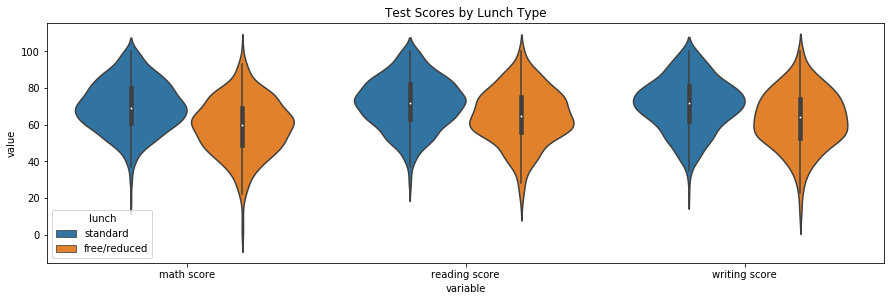

In [25]:
plt.figure(figsize=(15,15))

# create violin plot by lunch type
# melt the test scores together
sns.violinplot(hue='lunch', x='variable', y='value', 
             data=pd.melt(df, id_vars=['lunch'], 
                          value_vars=['math score', 'reading score', 'writing score']))
plt.title('Test Scores by Lunch Type')

plt.show()

### Interpreting the Chart
The students that paid the standard lunch rate on average scored better on each test. This could mean that the students that pay the standard rate come form wealthy backgrounds who could afford tutors and better educational experiences. 

## 3. Test Preperation

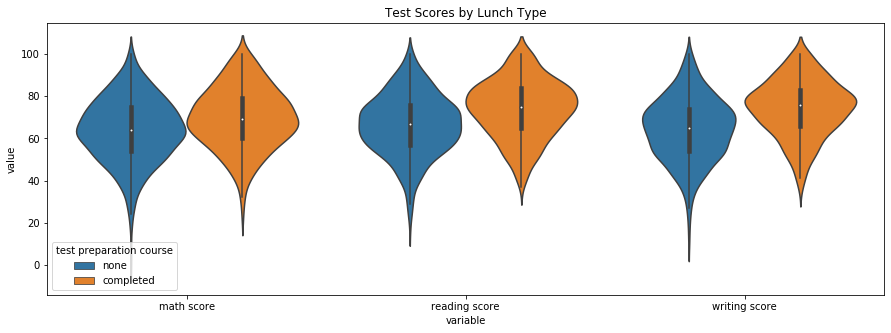

In [27]:
plt.figure(figsize=(15,5))

# create violin plot by lunch type
# melt the test scores together
sns.violinplot(hue='test preparation course', x='variable', y='value', 
             data=pd.melt(df, id_vars=['test preparation course'], 
                          value_vars=['math score', 'reading score', 'writing score']))
plt.title('Test Scores by Lunch Type')

plt.show()

### Interpreting the Chart
Students who studied and complete test prep course on average scored higher on exams.

## 4. Exam Score Correlation
The exam scores that have the highest correlation to each other are reading and writing. Note the correlation in the heatmap below. 

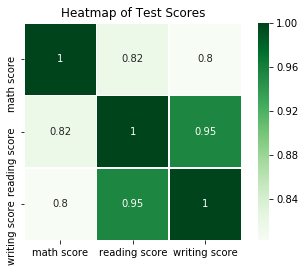

In [41]:
# create correlation matrices
correlation_scores = df.corr()

# plot heatmap
sns.heatmap(correlation_scores, square=True, annot=True, linewidths=.5, cmap='Greens')
plt.title('Heatmap of Test Scores')

plt.show()